# Linear Least Square Approximation and QR Factorization


## I. Evaluation of $e^x$  

### 1. Using Taylor Polynomial

The Taylor series expansion of $e^x$ is
\begin{equation}
    e^x = \sum_{j=0}^{\infty} \frac{x^j}{j!} \,.
\end{equation}

Numerically, we use a truncated Taylor polynomial 
for computation, e.g.
\begin{equation}
    e^x \approx s_N(x) = \sum_{j=0}^{N} \frac{x^j}{j!} \,.
\end{equation}

In [1]:
%%file myexp.m
function y = myexp(x, n)   % For demonstration only; DO NOT USE IT.
  y = 1;
  numer = 1;
  denom = 1;
  for i = 1:n
      numer = numer.*x;
      denom = denom*i;
      y = y + numer./denom;
  end
end

Created file '/home/tae/Dropbox/Sp19-Math3607/lectures/myexp.m'.


### 2. Improvement by LLS Method

With number of terms fixed, we can improve our approximation
by adjusting the coefficients of the Taylor polynomial.

**Task.**
Suppose we approximate $e^x$ using the polynomial
$$
    p_n(x) = 1 + c_1 x + c_2 x^2 + \cdots + c_n x^n \,,
$$
and we want the error $e^x - p_n(x)$ at the abscissas
$$
    0 < x_1 < x_2 < \cdots < x_m \le 1, \quad m > n
$$
as small as possible in the sense of 2-norm.

We learned that it is achieved by solving
$$
\begin{bmatrix}
    y_1 - 1 \\ y_2 - 1 \\ \vdots \\ y_m - 1
\end{bmatrix}
\text{"="}
\begin{bmatrix}
    x_1 & x_1^2 & \cdots & x_1^n \\
    x_2 & x_2^2 & \cdots & x_2^n \\
    \vdots & \vdots & \ddots & \vdots \\
    x_m & x_m^2 & \cdots & x_m^n
\end{bmatrix}
\begin{bmatrix}
    c_1 \\ c_2 \\ \vdots \\ c_n
\end{bmatrix} \,,
$$
or
$$
    \mathbf{y} - \mathtt{ones(m,1)} \, \text{"="} \, X \mathbf{c} \,.
$$

In MatLab, this can be solved by
```octave
    c = X \ (y - 1);
```
   

In [2]:
%%file exp_lls.m
function y = exp_lls(x, m, n)
% This function evaluates exp(x) on [0, 1]
% by modifying Taylor coefficients using LLS method.
% input: m = number of uniform data points
%            0 < x_1 < x_2 < \dots < x_m = 1
%        n = degree of truncation
%        x = points at which exp is to be approximated
% output: y = approximated exp(x)
  xdp = linspace(0, 1, m+1)';
  xdp(1) = [];
  ydp = exp(xdp);
  X = xdp.^(1:n);
  c = X\(ydp-1);   % this solves X^T X c = ydp - 1
  y = polyval(flip([1; c]), x);
end

Created file '/home/tae/Dropbox/Sp19-Math3607/lectures/exp_lls.m'.


**Task.** Use $m = 30$ and $n = 6$ to evaluate $e^x$ on $[0, 1]$ (at multiple points) using `myexp` and `exp_lls` and estimate the error between the two. 

In [3]:
m = 30; n = 6;
x = linspace(0, 1, 100);
y_exact = exp(x);
y_tay = myexp(x, n);
y_lls = exp_lls(x, m, n);
err_tay = norm(y_exact-y_tay, 'inf');
err_lls = norm(y_exact-y_lls, 'inf');
disp(' err_taylor      err_lls      e_t/e_l')
disp(num2str([err_tay, err_lls, err_tay/err_lls], 6))

 err_taylor      err_lls      e_t/e_l
0.000226273  5.70645e-08      3965.22


Let's plot.

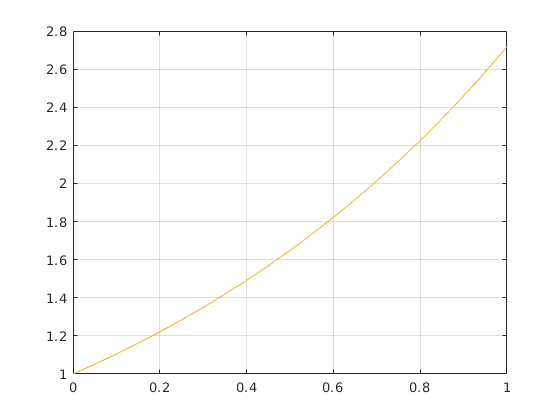

In [4]:
plot(x, [y_exact; y_tay; y_lls]), grid on

This is not very useful since the errors are very tiny compared to the scaling of the axes. So let's plot errors.

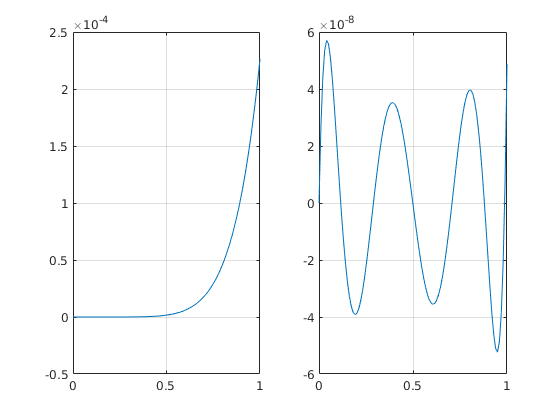

In [5]:
subplot(121)
plot(x, y_exact-y_tay), grid on
subplot(122)
plot(x, y_exact-y_lls), grid on

## II. QR Factorization

Consider the subspace 
$S = {\rm Sp} \{ \mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3 \} \subset \mathbb{R}^4$
where
$$
    \mathbf{v}_1 = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix},\;
    \mathbf{v}_2 = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix},\;
    \mathbf{v}_3 = \begin{bmatrix} 4 \\ 2 \\ -2 \\ 1 \end{bmatrix}.
$$

By the *Gram-Schmidt procedure*, we can obtain an orthonormal basis for $S$:
\begin{align}
    \mathbf{q}_1 & = \frac{\mathbf{v}_1}{\lVert \mathbf{v}_1 \rVert_2} \\
    \mathbf{w}_2 & = \mathbf{v}_2 - (\mathbf{v}_2^T) \mathbf{q}_1 \quad\text{and}\quad \mathbf{q}_2 = \frac{\mathbf{w}_2}{\lVert \mathbf{w}_2 \rVert_2} \\
    \mathbf{w}_3 & = \mathbf{v}_3 - (\mathbf{v}_3^T \mathbf{q}_1) \mathbf{q}_1 -(\mathbf{v}_3^T \mathbf{q}_2 ) \mathbf{q}_2 \quad\text{and}\quad \mathbf{q}_3 = \frac{\mathbf{w}_3}{\lVert \mathbf{w}_3 \rVert_2}
\end{align}

The result is
$$
    \mathbf{q}_1 = \frac{1}{2} \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}, \;
    \mathbf{q}_2 = \frac{1}{2} \begin{bmatrix} 1 \\ -1 \\ -1 \\ 1 \end{bmatrix}, \;
    \mathbf{q}_3 = \frac{1}{5\sqrt{2}} \begin{bmatrix} 3 \\ 4 \\ -4 \\ -3 \end{bmatrix}.
$$

Moreover, the equations above used to obtain these vectors can be written as the matrix equation

$$
    \begin{bmatrix} \mathbf{v}_1 & \mathbf{v}_2 & \mathbf{v}_3 \end{bmatrix}
    = \begin{bmatrix} \mathbf{q}_1 & \mathbf{q}_2 & \mathbf{q}_3 \end{bmatrix}
    \begin{bmatrix}
        \lVert \mathbf{v}_1 \rVert_2 & \mathbf{v}_2^T \mathbf{q}_1 & \mathbf{v}_3^T \mathbf{q}_1 \\
        0 & \lVert \mathbf{w}_1 \rVert_2 & \mathbf{v}_3^T \mathbf{q}_2 \\
        0 & 0 & \lVert \mathbf{w}_3 \rVert_2
    \end{bmatrix} \,,
$$
or simply $A = QR$.
    

In MatLab, we can easily calculate $Q$ and $R$ by

In [6]:
A = [1 1 1 1; 1 0 0 1; 4 2 -2 1]';
[Q, R] = qr(A, 0)


Q =

   -0.5000    0.5000    0.4243
   -0.5000   -0.5000    0.5657
   -0.5000   -0.5000   -0.5657
   -0.5000    0.5000   -0.4243


R =

   -2.0000   -1.0000   -2.5000
         0    1.0000    2.5000
         0         0    3.5355



The second input '0' indicates that MatLab is doing so-called the *thin QR factorization*. Without it, we obtain the *full/thick QR factorization*.

In [7]:
[Q, R] = qr(A)


Q =

   -0.5000    0.5000    0.4243   -0.5657
   -0.5000   -0.5000    0.5657    0.4243
   -0.5000   -0.5000   -0.5657   -0.4243
   -0.5000    0.5000   -0.4243    0.5657


R =

   -2.0000   -1.0000   -2.5000
         0    1.0000    2.5000
         0         0    3.5355
         0         0         0



Remember that the rank of the original matrix $V$ equals that of $R$. For example:

In [8]:
T = [1 1 1 1; 3 3 3 3; 6 4 0 3]';
[Qt, Rt] = qr(T, 0)


Qt =

   -0.5000   -0.5000    0.6163
   -0.5000    0.8333    0.2054
   -0.5000   -0.1667   -0.7575
   -0.5000   -0.1667   -0.0642


Rt =

   -2.0000   -6.0000   -6.5000
         0         0   -0.1667
         0         0    4.3269



## III. Generating $QR$ via Householder Transformations

*Explanation on whiteboard in class*

In [9]:
%%file myqr.m
function [Q, R] = myqr(A)
    [m,n] = size(A);
    A0 = A;
    Q = eye(m);
    for j = 1:min(m,n)
        Aj = A(j:m, j:n);
        z = Aj(:,1);
        v = z + sign0(z(1))*norm(z)*eye(length(z), 1);
        Hj = eye(length(v)) - 2/(v'*v) * v*v';
        Aj = Hj*Aj;
        H = eye(m);
        H(j:m,j:m) = Hj;
        Q = Q*H;
        A(j:m,j:n) = Aj;
    end
    R = A;
end 

% local function
function y = sign0(x)
    y = ones(size(x));
    y(x < 0) = -1;
end

Created file '/home/tae/Dropbox/Sp19-Math3607/lectures/myqr.m'.


Let's check if it agrees with MatLab.

In [10]:
[Q1, R1] = myqr(A)
Q, R


Q1 =

   -0.5000    0.5000    0.4243   -0.5657
   -0.5000   -0.5000    0.5657    0.4243
   -0.5000   -0.5000   -0.5657   -0.4243
   -0.5000    0.5000   -0.4243    0.5657


R1 =

   -2.0000   -1.0000   -2.5000
    0.0000    1.0000    2.5000
    0.0000   -0.0000    3.5355
    0.0000    0.0000         0


Q =

   -0.5000    0.5000    0.4243   -0.5657
   -0.5000   -0.5000    0.5657    0.4243
   -0.5000   -0.5000   -0.5657   -0.4243
   -0.5000    0.5000   -0.4243    0.5657


R =

   -2.0000   -1.0000   -2.5000
         0    1.0000    2.5000
         0         0    3.5355
         0         0         0

